**SENTIMENT ANALYSIS APP TIKET.COM**

In [1]:
!pip install google-play-scraper

In [2]:
from google_play_scraper import app, reviews, Sort, reviews_all

In [3]:
import pandas as pd  # Pandas untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np  # NumPy untuk komputasi numerik
seed = 0
np.random.seed(seed)  # Mengatur seed untuk reproduktibilitas
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi

import datetime as dt  # Manipulasi data waktu dan tanggal
import re  # Modul untuk bekerja dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia

from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks


In [4]:
import nltk  # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('punkt_tab')
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stop words) dalam berbagai bahasa.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
!pip install gensim==4.3.1 numpy==1.23.5 scipy==1.10.1 --no-cache-dir

from gensim.models import Word2Vec

## Scraping Dataset

In [6]:
# Mengimpor pustaka google_play_scraper untuk mengakses ulasan dan informasi aplikasi dari Google Play Store.
from google_play_scraper import app, reviews_all, Sort

# Mengambil semua ulasan dari aplikasi dengan ID 'com.tiket.gits' di Google Play Store.
# Proses scraping mungkin memerlukan beberapa saat tergantung pada jumlah ulasan yang ada.
scrapreview = reviews_all(
    'com.tiket.gits',          # ID aplikasi
    lang='id',             # Bahasa ulasan (default: 'en')
    country='id',          # Negara (default: 'us')
    sort=Sort.MOST_RELEVANT, # Urutan ulasan (default: Sort.MOST_RELEVANT)
    count=30000             # Jumlah maksimum ulasan yang ingin diambil
)

In [7]:
# Menyimpan ulasan dalam file CSV
import csv

with open('review_aplikasi.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Review'])  # Menulis header kolom
    for review in scrapreview:
        writer.writerow([review['content']])  # Menulis konten ulasan ke dalam file CSV

## Loading Dataset

In [8]:
app_reviews_df = pd.DataFrame(scrapreview)
app_reviews_df.shape
app_reviews_df.head()
app_reviews_df.to_csv('review_aplikasi.csv', index=False)

In [9]:
# Membuat DataFrame dari hasil scrapreview
app_reviews_df = pd.DataFrame(scrapreview)

# Menghitung jumlah baris dan kolom dalam DataFrame
jumlah_ulasan, jumlah_kolom = app_reviews_df.shape

In [10]:
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,3e285b93-5166-4034-bd95-61cb2e99ed46,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,terkadang tidak bisa melakukan pembayaran via ...,1,40,4.98.0,2025-03-27 09:57:42,"Hai Angga, Mohon maaf atas ketidaknyamanannya ...",2025-03-27 10:06:14,4.98.0
1,71184ecb-9204-4f98-9fdc-53e35ffd5a80,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Saya pesan hotel dan sudah dibayar, tetapi tid...",1,65,4.97.0,2025-02-08 16:59:11,"Hai Sobat tiket, Mohon maaf atas ketidaknyaman...",2025-02-08 17:13:25,4.97.0
2,73f9c182-f981-4faf-b763-199dd37bbc93,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Hati hati gunakan aplikasi ini, saya dirugikan...",1,54,4.98.0,2025-03-14 03:40:46,Hai Abdillah H Alkaf. Mohon maaf atas ketidakn...,2025-03-14 04:18:20,4.98.0
3,6fb4f8ea-0953-477b-ae65-4d56a3bb3367,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,harga tiket pesawat tiba tiba berubah dari mas...,1,2,4.100.1,2025-04-09 05:42:19,Hai Faizal. Mohon maaf atas ketidaknyamanannya...,2025-04-08 18:58:03,4.100.1
4,0e926f42-0e9d-414a-a007-3b891a95bded,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasi di log in gabisa, di daftar susah. Ad...",1,0,4.100.1,2025-04-10 10:28:38,Hai Sobat tiket. Mohon maaf atas ketidaknyaman...,2025-04-10 11:03:11,4.100.1


In [11]:
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64857 entries, 0 to 64856
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              64857 non-null  object        
 1   userName              64857 non-null  object        
 2   userImage             64857 non-null  object        
 3   content               64854 non-null  object        
 4   score                 64857 non-null  int64         
 5   thumbsUpCount         64857 non-null  int64         
 6   reviewCreatedVersion  53318 non-null  object        
 7   at                    64857 non-null  datetime64[ns]
 8   replyContent          9701 non-null   object        
 9   repliedAt             9701 non-null   datetime64[ns]
 10  appVersion            53318 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 5.4+ MB


In [12]:
#drop null value
clean_df = app_reviews_df.dropna()

In [13]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7150 entries, 0 to 62050
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              7150 non-null   object        
 1   userName              7150 non-null   object        
 2   userImage             7150 non-null   object        
 3   content               7150 non-null   object        
 4   score                 7150 non-null   int64         
 5   thumbsUpCount         7150 non-null   int64         
 6   reviewCreatedVersion  7150 non-null   object        
 7   at                    7150 non-null   datetime64[ns]
 8   replyContent          7150 non-null   object        
 9   repliedAt             7150 non-null   datetime64[ns]
 10  appVersion            7150 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 670.3+ KB


In [14]:
#Menghapus baris duplikat dari DataFrame clean_df
clean_df = clean_df.drop_duplicates()

# Menghitung jumlah baris dan kolom dalam DataFrame clean_df setelah menghapus duplikat
jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape

## Preprocessing Data

In [15]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers
    text = re.sub(r'[^\w\s]', '', text) # remove numbers


    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower()
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

    return stemmed_text
def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

In [16]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [17]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,3e285b93-5166-4034-bd95-61cb2e99ed46,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,terkadang tidak bisa melakukan pembayaran via ...,1,40,4.98.0,2025-03-27 09:57:42,"Hai Angga, Mohon maaf atas ketidaknyamanannya ...",2025-03-27 10:06:14,4.98.0
1,71184ecb-9204-4f98-9fdc-53e35ffd5a80,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Saya pesan hotel dan sudah dibayar, tetapi tid...",1,65,4.97.0,2025-02-08 16:59:11,"Hai Sobat tiket, Mohon maaf atas ketidaknyaman...",2025-02-08 17:13:25,4.97.0
2,73f9c182-f981-4faf-b763-199dd37bbc93,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Hati hati gunakan aplikasi ini, saya dirugikan...",1,54,4.98.0,2025-03-14 03:40:46,Hai Abdillah H Alkaf. Mohon maaf atas ketidakn...,2025-03-14 04:18:20,4.98.0
3,6fb4f8ea-0953-477b-ae65-4d56a3bb3367,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,harga tiket pesawat tiba tiba berubah dari mas...,1,2,4.100.1,2025-04-09 05:42:19,Hai Faizal. Mohon maaf atas ketidaknyamanannya...,2025-04-08 18:58:03,4.100.1
4,0e926f42-0e9d-414a-a007-3b891a95bded,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasi di log in gabisa, di daftar susah. Ad...",1,0,4.100.1,2025-04-10 10:28:38,Hai Sobat tiket. Mohon maaf atas ketidaknyaman...,2025-04-10 11:03:11,4.100.1
...,...,...,...,...,...,...,...,...,...,...,...
61370,03b0b834-a323-4bd0-96ce-0d0c8e1c9210,iglima syafitri,https://play-lh.googleusercontent.com/a-/ALV-U...,Respon lama,1,0,3.31.1,2020-08-18 01:35:44,"Hai Iglima, Sedih rasanya kamu hanya memberika...",2020-08-18 12:13:40,3.31.1
61404,4787da21-a24f-43ba-b7ca-4d340aedf34b,tonto gangyz,https://play-lh.googleusercontent.com/a-/ALV-U...,Jelek banget,1,0,3.31.1,2020-08-06 00:41:49,"Hai Tonto,\n\nMohon maaf atas ketidaknyamanan ...",2020-08-06 02:54:45,3.31.1
61456,a9d1010b-475a-4ef3-af63-eea3eef3c06f,Siswita Rahmah,https://play-lh.googleusercontent.com/a-/ALV-U...,Update teruuss,1,0,3.32.2,2020-09-01 15:59:36,"Hai Siswita,\n\nMohon maaf sebelumnya terkait ...",2020-09-01 16:59:18,3.32.2
61939,47b89d85-5a4c-4b81-8bb7-9907c9187525,Imron Imron,https://play-lh.googleusercontent.com/a/ACg8oc...,Oke,1,0,3.31.1,2020-08-12 10:47:11,"Hi Imron,\n\nSedih banget kamu hanya memberika...",2020-08-12 17:20:42,3.31.1


In [18]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

In [19]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,3e285b93-5166-4034-bd95-61cb2e99ed46,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,terkadang tidak bisa melakukan pembayaran via ...,1,40,4.98.0,2025-03-27 09:57:42,"Hai Angga, Mohon maaf atas ketidaknyamanannya ...",2025-03-27 10:06:14,4.98.0,terkadang tidak bisa melakukan pembayaran via ...,terkadang tidak bisa melakukan pembayaran via ...,terkadang tidak bisa melakukan pembayaran via ...,"[terkadang, tidak, bisa, melakukan, pembayaran...","[terkadang, pembayaran, via, indomaret, alfama...",terkadang pembayaran via indomaret alfamartlal...
1,71184ecb-9204-4f98-9fdc-53e35ffd5a80,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Saya pesan hotel dan sudah dibayar, tetapi tid...",1,65,4.97.0,2025-02-08 16:59:11,"Hai Sobat tiket, Mohon maaf atas ketidaknyaman...",2025-02-08 17:13:25,4.97.0,Saya pesan hotel dan sudah dibayar tetapi tida...,saya pesan hotel dan sudah dibayar tetapi tida...,saya pesan hotel dan sudah dibayar tetapi tida...,"[saya, pesan, hotel, dan, sudah, dibayar, teta...","[pesan, hotel, dibayar, terbit, tiketnya, apli...",pesan hotel dibayar terbit tiketnya aplikasi s...
2,73f9c182-f981-4faf-b763-199dd37bbc93,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Hati hati gunakan aplikasi ini, saya dirugikan...",1,54,4.98.0,2025-03-14 03:40:46,Hai Abdillah H Alkaf. Mohon maaf atas ketidakn...,2025-03-14 04:18:20,4.98.0,Hati hati gunakan aplikasi ini saya dirugikan ...,hati hati gunakan aplikasi ini saya dirugikan ...,hati hati gunakan aplikasi ini saya dirugikan ...,"[hati, hati, gunakan, aplikasi, ini, saya, dir...","[hati, hati, aplikasi, dirugikan, juta, refund...",hati hati aplikasi dirugikan juta refund tiket...
3,6fb4f8ea-0953-477b-ae65-4d56a3bb3367,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,harga tiket pesawat tiba tiba berubah dari mas...,1,2,4.100.1,2025-04-09 05:42:19,Hai Faizal. Mohon maaf atas ketidaknyamanannya...,2025-04-08 18:58:03,4.100.1,harga tiket pesawat tiba tiba berubah dari mas...,harga tiket pesawat tiba tiba berubah dari mas...,harga tiket pesawat tiba tiba berubah dari mas...,"[harga, tiket, pesawat, tiba, tiba, berubah, d...","[harga, tiket, pesawat, berubah, maskapai, pas...",harga tiket pesawat berubah maskapai pas checo...
4,0e926f42-0e9d-414a-a007-3b891a95bded,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasi di log in gabisa, di daftar susah. Ad...",1,0,4.100.1,2025-04-10 10:28:38,Hai Sobat tiket. Mohon maaf atas ketidaknyaman...,2025-04-10 11:03:11,4.100.1,Aplikasi di log in gabisa di daftar susah Ada ...,aplikasi di log in gabisa di daftar susah ada ...,aplikasi di log in gabisa di daftar susah ada ...,"[aplikasi, di, log, in, gabisa, di, daftar, su...","[aplikasi, log, gabisa, daftar, susah, sistem,...",aplikasi log gabisa daftar susah sistem refund...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61370,03b0b834-a323-4bd0-96ce-0d0c8e1c9210,iglima syafitri,https://play-lh.googleusercontent.com/a-/ALV-U...,Respon lama,1,0,3.31.1,2020-08-18 01:35:44,"Hai Iglima, Sedih rasanya kamu hanya memberika...",2020-08-18 12:13:40,3.31.1,Respon lama,respon lama,respon lama,"[respon, lama]",[respon],respon
61404,4787da21-a24f-43ba-b7ca-4d340aedf34b,tonto gangyz,https://play-lh.googleusercontent.com/a-/ALV-U...,Jelek banget,1,0,3.31.1,2020-08-06 00:41:49,"Hai Tonto,\n\nMohon maaf atas ketidaknyamanan ...",2020-08-06 02:54:45,3.31.1,Jelek banget,jelek banget,jelek banget,"[jelek, banget]","[jelek, banget]",jelek banget
61456,a9d1010b-475a-4ef3-af63-eea3eef3c06f,Siswita Rahmah,https://play-lh.googleusercontent.com/a-/ALV-U...,Update teruuss,1,0,3.32.2,2020-09-01 15:59:36,"Hai Siswita,\n\nMohon maaf sebelumnya terkait ...",2020-09-01 16:59:18,3.32.2,Update teruuss,upd

## Pelabelan

In [20]:
import csv
import requests
from io import StringIO

# Loads positive lexicon data from GitHub
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")

# Loads negative lexicon data from GitHub
# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya ke dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")


In [21]:
# Function to determine sentiment polarity of tweets
# Fungsi untuk menentukan polaritas sentimen dari tweet

def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:

    score = 0
    # Inisialisasi skor sentimen ke 0

    for word in text:
        # Mengulangi setiap kata dalam teks

        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen

    for word in text:
        # Mengulangi setiap kata dalam teks (sekali lagi)

        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen

    polarity=''
    # Inisialisasi variabel polaritas

    if (score >= 0):
        polarity = 'positive'
        # Jika skor sentimen lebih besar atau sama dengan 0, maka polaritas adalah positif
    elif (score < 0):
        polarity = 'negative'
        # Jika skor sentimen kurang dari 0, maka polaritas adalah negatif

    return score, polarity
    # Mengembalikan skor sentimen dan polaritas teks

In [22]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
positive    3756
negative    3394
Name: count, dtype: int64


In [23]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'positive_tweets' yang hanya berisi tweet dengan polaritas positif.
positive_tweets = clean_df[clean_df['polarity'] == 'positive']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'positive_tweets'.
positive_tweets = positive_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

# Mengurutkan DataFrame 'positive_tweets' berdasarkan 'polarity_score' secara menurun.
positive_tweets = positive_tweets.sort_values(by='polarity_score', ascending=False)

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
positive_tweets = positive_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
positive_tweets.index += 1

In [24]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'negative_tweets' yang hanya berisi tweet dengan polaritas negatif.
negative_tweets = clean_df[clean_df['polarity'] == 'negative']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'negative_tweets'.
negative_tweets = negative_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

# Mengurutkan DataFrame 'negative_tweets' berdasarkan 'polarity_score' secara menaik (ascending).
negative_tweets = negative_tweets.sort_values(by='polarity_score', ascending=True)

# Memilih 10 baris pertama dari DataFrame yang sudah diurutkan.
negative_tweets = negative_tweets[0:10]

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
negative_tweets = negative_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
negative_tweets.index += 1

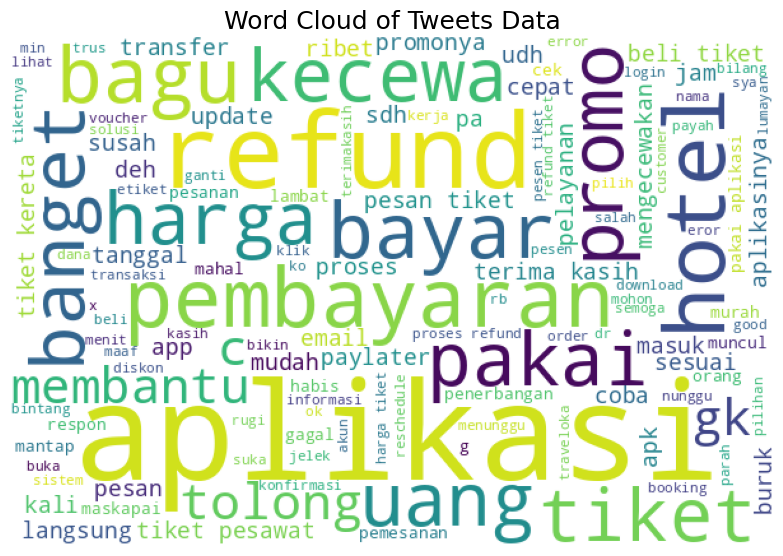

In [25]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan.
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'clean_df'.
for tweet in clean_df['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

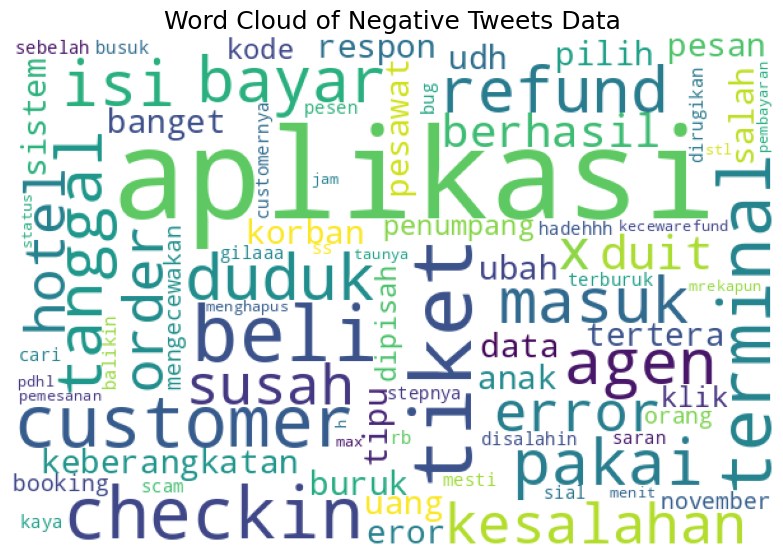

In [26]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan dalam tweet negatif.
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'negative_tweets'.
for tweet in negative_tweets['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Negative Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

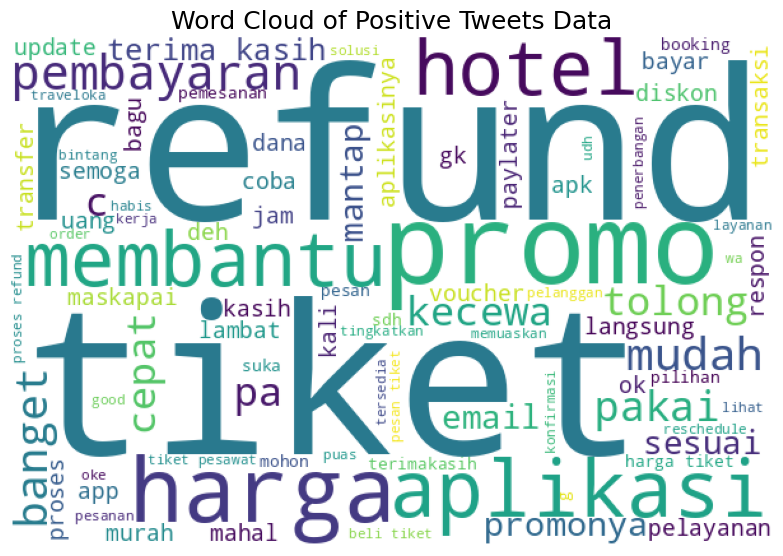

In [27]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan dalam tweet positif.
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'positive_tweets'.
for tweet in positive_tweets['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Positive Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

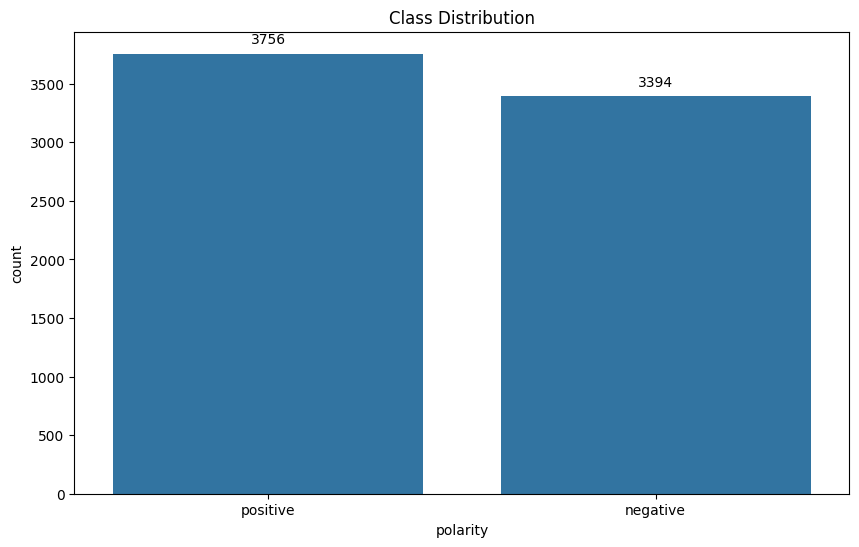

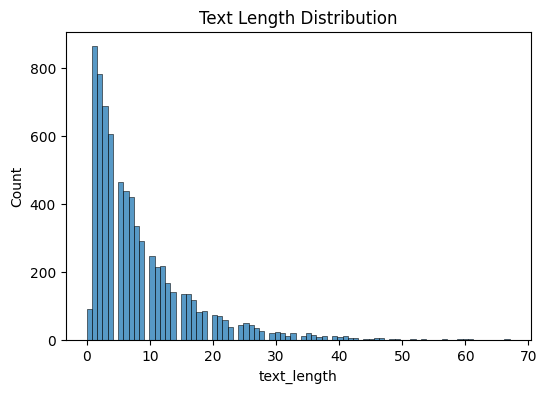

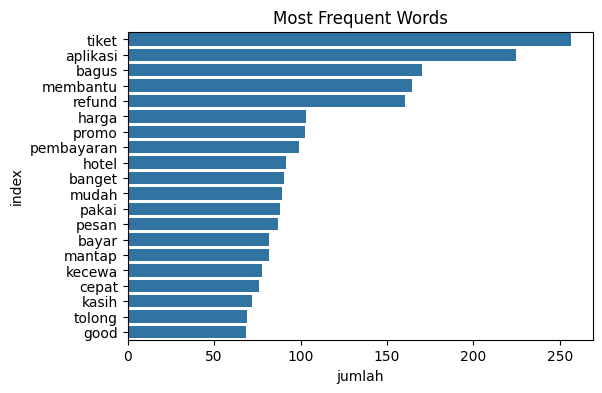

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Set the figure size
plt.figure(figsize=(10, 6))

# Check class distribution
class_dist_plot = sns.countplot(x='polarity', data=clean_df)
plt.title('Class Distribution')

# Add counts above the bars on the plot
for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'),
                              (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha='center', va='center',
                              xytext=(0, 10),
                              textcoords='offset points')

plt.show()

# Set the figure size
plt.figure(figsize=(6, 4))

# Visualize text length distribution
clean_df['text_length'] = clean_df['text_akhir'].apply(lambda x: len(x.split()))
sns.histplot(clean_df['text_length'])
plt.title('Text Length Distribution')
plt.show()

# Set the figure size
plt.figure(figsize=(6, 4))

# Visualize most frequent words
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(clean_df['text_akhir'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Most Frequent Words')
plt.show()

## Skema 1: Pemodelan dengan Ekstraksi Fitur TF-IDF (Splitting 80/20)

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = clean_df['text_akhir']
y = clean_df['polarity']

In [31]:
# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X)

In [32]:
# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df

,akun,alasan,aneh,api,apk,aplikasi,aplikasinya,app,april,bagus,...,trus,tujuan,tunggu,uang,udh,uninstall,update,via,voucher,wa
0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.321105,0.0,0.0
1,0.00000,0.000000,0.0,0.0,0.0,0.524794,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.17834,0.189049,0.0,0.0,0.0,0.089310,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.00000,0.000000,0.0,0.0,0.0,0.123179,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.00000,0.000000,0.0,0.0,0.0,0.126305,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
7146,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
7147,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0
7148,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [33]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [34]:
# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

SVM

In [35]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Membuat objek model SVM
svm_model = SVC(kernel='linear')  # Kernel linear cocok untuk pemodelan teks

# Melatih model SVM pada data pelatihan
svm_model.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_svm = svm_model.predict(X_train.toarray())
y_pred_test_svm = svm_model.predict(X_test.toarray())

# Evaluasi akurasi model SVM
accuracy_train_svm = accuracy_score(y_pred_train_svm, y_train)
accuracy_test_svm = accuracy_score(y_pred_test_svm, y_test)

# Menampilkan akurasi
print('SVM - accuracy_train:', accuracy_train_svm)
print('SVM - accuracy_test:', accuracy_test_svm)

SVM - accuracy_train: 0.8767482517482518
SVM - accuracy_test: 0.8524475524475524


Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

# Membuat objek model Logistic Regression
logistic_regression = LogisticRegression()

# Melatih model Logistic Regression pada data pelatihan
logistic_regression.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_lr = logistic_regression.predict(X_train.toarray())
y_pred_test_lr = logistic_regression.predict(X_test.toarray())

# Evaluasi akurasi model Logistic Regression pada data pelatihan
accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train)

# Evaluasi akurasi model Logistic Regression pada data uji
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test)

# Menampilkan akurasi
print('Logistic Regression - accuracy_train:', accuracy_train_lr)
print('Logistic Regression - accuracy_test:', accuracy_test_lr)

Logistic Regression - accuracy_train: 0.8758741258741258
Logistic Regression - accuracy_test: 0.8475524475524475


Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

# Membuat objek model Random Forest
random_forest = RandomForestClassifier()

# Melatih model Random Forest pada data pelatihan
random_forest.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_rf = random_forest.predict(X_train.toarray())
y_pred_test_rf = random_forest.predict(X_test.toarray())

# Evaluasi akurasi model Random Forest
accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)

# Menampilkan akurasi
print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)

Random Forest - accuracy_train: 0.9666083916083916
Random Forest - accuracy_test: 0.83006993006993


XGBoost

In [38]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Konversi label y_train dan y_test ke numerik
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)  # Mengubah ke angka (misal: 'negative' → 0, 'positive' → 1)
y_test_encoded = encoder.transform(y_test)  # Transformasi sesuai mapping yang dibuat di fit_transform()

# Buat model XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Latih model
xgb_model.fit(X_train.toarray(), y_train_encoded)

# Prediksi pada data train & test
y_pred_train = xgb_model.predict(X_train.toarray())
y_pred_test = xgb_model.predict(X_test.toarray())

# Evaluasi akurasi
accuracy_train_xgb = accuracy_score(y_train_encoded, y_pred_train)
accuracy_test_xgb = accuracy_score(y_test_encoded, y_pred_test)

# Menampilkan hasil
print('XGBoost - Accuracy Train:', accuracy_train_xgb)
print('XGBoost - Accuracy Test:', accuracy_test_xgb)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:16:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Accuracy Train: 0.9171328671328671
XGBoost - Accuracy Test: 0.8405594405594405


In [39]:
# Membuat DataFrame untuk hasil akurasi
results_df = pd.DataFrame({
    'Model': ['SVM', 'Logistic Regression', 'Random Forest', 'XGBoost'],
    'Accuracy Train': [accuracy_train_svm, accuracy_train_lr, accuracy_train_rf, accuracy_train_xgb],
    'Accuracy Test': [accuracy_test_svm, accuracy_test_lr, accuracy_test_rf, accuracy_test_xgb]
})
# Menampilkan hanya kolom "Accuracy Test"
accuracy_test_only = results_df[['Model', 'Accuracy Test']]
print(accuracy_test_only)

                 Model  Accuracy Test
0                  SVM       0.852448
1  Logistic Regression       0.847552
2        Random Forest       0.830070
3              XGBoost       0.840559


## Skema 2: Pemodelan dengan Ekstraksi Fitur Word2Vec (Splitting 80/20)

In [40]:
from sklearn.model_selection import train_test_split

# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = clean_df['text_akhir'].apply(lambda x: x.split())  # Konversi teks menjadi list kata
y = clean_df['polarity']

# Latih model Word2Vec
w2v_model = Word2Vec(sentences=X, vector_size=200, window=5, min_count=5, workers=4)

# Fungsi untuk mendapatkan vektor kalimat dari rata-rata vektor kata
def get_sentence_vector(sentence, model, vector_size=200):
    vectors = [model.wv[word] for word in sentence if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(vector_size)

# Konversi teks menjadi vektor menggunakan Word2Vec
X_w2v = np.array([get_sentence_vector(sentence, w2v_model, 200) for sentence in X])

# Konversi ke dataframe agar mudah dibaca
features_df = pd.DataFrame(X_w2v)

# Menampilkan hasil ekstraksi fitur
print(features_df.head())

# Bagi data menjadi data latih dan data uji
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_w2v, y, test_size=0.2, random_state=42)

        0         1         2         3         4         5         6    \
0  0.005384 -0.038499  0.061432  0.169078  0.270786 -0.042706 -0.064553   
1  0.003413 -0.048299  0.077418  0.208229  0.340586 -0.054548 -0.084072   
2  0.004009 -0.051447  0.085166  0.224381  0.366936 -0.057693 -0.089524   
3  0.003232 -0.050080  0.072956  0.209926  0.339037 -0.053273 -0.076126   
4 -0.000240 -0.049288  0.085298  0.218008  0.362828 -0.055152 -0.089125   

        7         8         9    ...       190       191       192       193  \
0  0.145169 -0.088834  0.111059  ...  0.152126 -0.088085 -0.154095 -0.139062   
1  0.178224 -0.110546  0.138612  ...  0.190727 -0.108941 -0.189964 -0.172470   
2  0.192569 -0.118610  0.147942  ...  0.207918 -0.117915 -0.207374 -0.189141   
3  0.174907 -0.111513  0.138707  ...  0.185376 -0.103764 -0.181753 -0.168735   
4  0.188335 -0.115787  0.149468  ...  0.207510 -0.114369 -0.205884 -0.187158   

        194       195       196       197       198       199  
0  0

SVM

In [41]:
# Buat dan latih model SVM
svm_model2 = SVC(kernel='linear')
svm_model2.fit(X_train2, y_train2)

# Buat dan latih model Random Forest
rf_model2 = RandomForestClassifier()
rf_model2.fit(X_train2, y_train2)

# Buat dan latih model Logistic Regression
lr_model2 = LogisticRegression()
lr_model2.fit(X_train2, y_train2)

# Prediksi sentimen menggunakan semua model
y_pred_train2_svm = svm_model2.predict(X_train2)
y_pred_test2_svm = svm_model2.predict(X_test2)

y_pred_train2_rf = rf_model2.predict(X_train2)
y_pred_test2_rf = rf_model2.predict(X_test2)

y_pred_train2_lr = lr_model2.predict(X_train2)
y_pred_test2_lr = lr_model2.predict(X_test2)

# Evaluasi akurasi untuk semua model
accuracy_train2_svm = accuracy_score(y_pred_train2_svm, y_train2)
accuracy_test2_svm = accuracy_score(y_pred_test2_svm, y_test2)

accuracy_train2_rf = accuracy_score(y_pred_train2_rf, y_train2)
accuracy_test2_rf = accuracy_score(y_pred_test2_rf, y_test2)

accuracy_train2_lr = accuracy_score(y_pred_train2_lr, y_train2)
accuracy_test2_lr = accuracy_score(y_pred_test2_lr, y_test2)

# Membuat DataFrame untuk hasil akurasi
results_df2 = pd.DataFrame({
    'Model': ['SVM', 'Logistic Regression', 'Random Forest'],
    'Accuracy Train': [accuracy_train2_svm, accuracy_train2_lr, accuracy_train2_rf],
    'Accuracy Test': [accuracy_test2_svm, accuracy_test2_lr, accuracy_test2_rf]
})

# Menampilkan hanya kolom "Accuracy Test"
accuracy_test_only2 = results_df2[['Model', 'Accuracy Test']]
print(accuracy_test_only2)


                 Model  Accuracy Test
0                  SVM       0.641958
1  Logistic Regression       0.637762
2        Random Forest       0.746154


## Skema 3: Pemodelan dengan Ekstraksi Fitur TF-IDF (Splitting 70/30)

In [42]:
# Bagi data menjadi data latih dan data uji dengan membagi data dengan rasio 70/30
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

In [43]:
# Buat dan latih model SVM
svm_model3 = SVC(kernel='linear')
svm_model3.fit(X_train3, y_train3)

# Buat dan latih model Random Forest
rf_model3 = RandomForestClassifier()
rf_model3.fit(X_train3, y_train3)

# Buat dan latih model Logistic Regression
lr_model3 = LogisticRegression()
lr_model3.fit(X_train3, y_train3)

# Prediksi sentimen menggunakan semua model
y_pred_train3_svm = svm_model3.predict(X_train3)
y_pred_test3_svm = svm_model3.predict(X_test3)

y_pred_train3_rf = rf_model3.predict(X_train3)
y_pred_test3_rf = rf_model3.predict(X_test3)

y_pred_train3_lr = lr_model3.predict(X_train3)
y_pred_test3_lr = lr_model3.predict(X_test3)

# Evaluasi akurasi untuk semua model
accuracy_train3_svm = accuracy_score(y_pred_train3_svm, y_train3)
accuracy_test3_svm = accuracy_score(y_pred_test3_svm, y_test3)

accuracy_train3_rf = accuracy_score(y_pred_train3_rf, y_train3)
accuracy_test3_rf = accuracy_score(y_pred_test3_rf, y_test3)

accuracy_train3_lr = accuracy_score(y_pred_train3_lr, y_train3)
accuracy_test3_lr = accuracy_score(y_pred_test3_lr, y_test3)

# Membuat DataFrame untuk hasil akurasi
results_df3 = pd.DataFrame({
    'Model': ['SVM', 'Logistic Regression', 'Random Forest'],
    'Accuracy Train': [accuracy_train3_svm, accuracy_train3_lr, accuracy_train3_rf],
    'Accuracy Test': [accuracy_test3_svm, accuracy_test3_lr, accuracy_test3_rf]
})

# Menampilkan hanya kolom "Accuracy Test"
accuracy_test_only3 = results_df3[['Model', 'Accuracy Test']]
print(accuracy_test_only3)

                 Model  Accuracy Test
0                  SVM       0.848019
1  Logistic Regression       0.848485
2        Random Forest       0.816783


## Kesimpulan

Telah dilakukan analisis sentimen pada review aplikasi Tiketdotcom. Data diperoleh dari hasil scrapping dari Google Play Store dengan sampel data yang diambil sebanyak 30.000 data. Dilakukan pemodelan dan ekstraksi fitur dengan 3 skema yang memberikan hasil sebagai berikut:

Skema 1: Pemodelan dengan Ekstraksi Fitur TF-IDF dan Splitting Data 80/20

                     Model  Accuracy Test
    0                  SVM       0.871921
    1  Logistic Regression       0.870514
    2        Random Forest       0.826179
    3              XGBoost       0.852920

Skema 2: Pemodelan dengan Ekstraksi Fitur Word2Vec dan Splitting Data 80/20

                      Model  Accuracy Test
    0                  SVM       0.637579
    1  Logistic Regression       0.609430
    2        Random Forest       0.749472

Skema 3: Pemodelan dengan Ekstraksi Fitur TF-IDF dan Splitting Data 70/30

                      Model  Accuracy Test
    0                  SVM       0.860160
    1  Logistic Regression       0.862506
    2        Random Forest       0.828719

Dari ketiga skema yangt telah dilakukan, tampak bahwa kombinasi pemodelan SVM dengan ekstraksi fitur TF-IDF dan splitting 80/20 memiliki akurasi paling tinggi dibanding kombinasi pemodelan lainnya.